<a href="https://colab.research.google.com/github/nicolasero87/PPL_ALTAS/blob/main/PPL_ALTAS_Nicolas_Roman_15_08_24_16_HS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/nicolasero87/PPL_ALTAS.git

Cloning into 'PPL_ALTAS'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 357.62 KiB | 1.48 MiB/s, done.


In [ ]:
import pandas as pd
df = pd.read_excel('/content/PPL_ALTAS/DB_Altas_PPL_Entrega 19-08.xlsx')

In [ ]:
df.head()

,ID,fecha308,Sexo,nacionalidad,bienjuridico,clasifcg,depto,DeptoOrganismoFinal,OrganismoFinal,DeptoUFI,UFI,DeptoUFD,UFD,DepPolicial,Flagrancia,revifag,DelitoMaxPena
0,1,2019-01-02,M,Argentina,Delitos contra las personas,Lesiones leves agravadas,Avellaneda,Lomas De Zamora,JE-Juzgado de Ejecucion Nº 2,Lomas De Zamora,Unidad de Asist. Juicio Común y por Jurados,Lomas De Zamora,DEFENSORIA DE EJECUCION PENAL N° 4,Lanus 10º,NaN,NO,Lesiones agravadas artículo 89 - Art.92
1,2,2019-01-02,M,Argentina,Delitos contra la propiedad,Robo agravado uso de arma,Avellaneda,Avellaneda,JG-Juz. Gar. N° 1 - Avellaneda,Avellaneda,AVELLANEDA - UFIyJ Nº 1,Avellaneda,Unidad de Defensa Penal N° 4 AVELLANEDA,Avellaneda 4º,NaN,NO,Robo agravado (uso de armas de fuego) - Art.16...
2,3,2019-01-02,M,Argentina,Delitos contra las personas,Lesiones leves,Avellaneda,Avellaneda,JG-Juz. Gar. N° 1 - Avellaneda,Avellaneda,"AVELLANEDA - UFIyJ Nº 2 (Int. Sexual, del. Inf...",Avellaneda,Unidad de Defensa Penal N° 4 AVELLANEDA,Avellaneda 7º,NaN,NO,Lesiones leves - Art.89
3,4,2019-01-02,M,Argentina,Delitos contra la seguridad pública,Portación y Tenencia de arma de fuego,Avellaneda,Avellaneda,JG-Juz. Gar. N° 3 - Lanus,Avellaneda,UFIyJ N° 6 – Lanús,Avellaneda,Unidad de Defensa Penal N° 8 LANÚS,Lanus 2º,NaN,NO,Portacion ilegal de arma de guerra - Art.189 b...
4,5,2019-01-02,M,Argentina,Delitos contra las personas,Lesiones leves,Avellaneda,Avellaneda,JG-Juz. Gar. N° 1 - Avellaneda,Avellaneda,"AVELLANEDA - UFIyJ Nº 2 (Int. Sexual, del. Inf...",Avellaneda,Unidad de Defensa Penal N° 4 AVELLANEDA,Avellaneda 4º,NaN,NO,Lesiones leves - Art.89


In [ ]:
df.shape

(2009, 25)

In [ ]:
df.depto.unique()

array(['Avellaneda', 'Azul', 'Bahia Blanca', 'Dolores', 'Junin',
       'La Matanza', 'La Plata', 'Lomas De Zamora', 'Mar Del Plata',
       'Mercedes', 'Moreno-Gral. Rodriguez'], dtype=object)

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identificar las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar las columnas categóricas
#print("Columnas categóricas:", columnas_categoricas)

# Seleccionar las columnas categóricas que deseas codificar
columnas_categoricas = [ 'Sexo', 'bienjuridico', 'clasifcg', 'depto']
# Crear el codificador OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar los datos
one_hot_encoded = encoder.fit_transform(df[columnas_categoricas])

# Crear un DataFrame con los datos codificados
df_one_hot = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columnas_categoricas))

# Concatenar el DataFrame original con el DataFrame codificado
df_final = pd.concat([df, df_one_hot], axis=1).drop(columns=columnas_categoricas)

# Mostrar las primeras filas del DataFrame final
print(df_final.head())

   id Unico    fecha308  ID_sexo  ID_bienjuridico  ID_clasifcg  ID_depto  \
0         1  03-04-2024        1              1.0          1.0         1   
1         2  03-04-2024        1              2.0          2.0         1   
2         3  03-04-2024        1              3.0          3.0         1   
3         4  03-04-2024        1              1.0          4.0         1   
4         5  03-04-2024        2              4.0          5.0         1   

   ID_Depto Organismo Final Depto Organismo Final  \
0                       1.0            Avellaneda   
1                       1.0            Avellaneda   
2                       1.0            Avellaneda   
3                       1.0            Avellaneda   
4                       1.0            Avellaneda   

                      Organismo Final        Depto UFI  ... depto_Azul  \
0  JE-Juzgado de Ejecucion Penal Nº 1       Avellaneda  ...        0.0   
1      JG-Juz. Gar. N° 1 - Avellaneda       Avellaneda  ...        0.0   
2 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Identificar las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar las columnas categóricas
#print("Columnas categóricas:", columnas_categoricas)

# Seleccionar las columnas categóricas que deseas codificar
#columnas_categoricas = [ 'Sexo', 'bienjuridico', 'clasifcg', 'depto']

umbral_cardinalidad = 10

# Filtrar columnas con alta cardinalidad
columnas_baja_cardinalidad = [col for col in columnas_categoricas if df[col].nunique() <= umbral_cardinalidad]

# Agrupar categorías raras en columnas con alta cardinalidad
for col in columnas_categoricas:
    if df[col].nunique() > umbral_cardinalidad:
        frecuencias = df[col].value_counts(normalize=True)
        categorias_raras = frecuencias[frecuencias < 0.05].index  # Agrupar categorías que representan menos del 5%
        df[col] = df[col].apply(lambda x: 'Otros' if x in categorias_raras else x)

# Crear el codificador OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustar y transformar los datos
one_hot_encoded = encoder.fit_transform(df[columnas_baja_cardinalidad])

# Crear un DataFrame con los datos codificados
df_one_hot = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columnas_baja_cardinalidad))

# Concatenar el DataFrame original con el DataFrame codificado
df_final = pd.concat([df, df_one_hot], axis=1).drop(columns=columnas_baja_cardinalidad)

# Mostrar las primeras filas del DataFrame final
print(df_final.head())

   ID  Color_Azul  Color_Rojo  Color_Verde
0   1         0.0         1.0          0.0
1   2         0.0         0.0          1.0
2   3         1.0         0.0          0.0
3   4         0.0         1.0          0.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
##ahora que tengo los datos codificados hare algunos analisis adicionales:

print(df_final[['Color_Azul', 'Color_Rojo', 'Color_Verde']].sum())


Color_Azul     1.0
Color_Rojo     2.0
Color_Verde    1.0
dtype: float64


In [ ]:
##analisis de correlacion para  ver si hay alguna correlación entre los colores y otras variables en el DataFrame.
print(df_final.corr())


                   ID  Color_Azul  Color_Rojo  Color_Verde
ID           1.000000    0.258199     0.00000    -0.258199
Color_Azul   0.258199    1.000000    -0.57735    -0.333333
Color_Rojo   0.000000   -0.577350     1.00000    -0.577350
Color_Verde -0.258199   -0.333333    -0.57735     1.000000


In [ ]:
##Visualizacion de los datos:

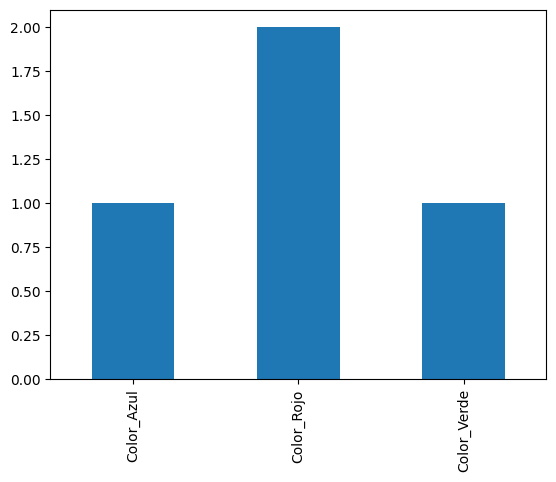

In [ ]:
import matplotlib.pyplot as plt
df_final[['Color_Azul', 'Color_Rojo', 'Color_Verde']].sum().plot(kind='bar')
plt.show()

##no entiedo como hacer un grafico con estos colores azul rojo y verde???



In [ ]:
##no entiedo como hacer un grafico con estos colores azul rojo y verde???
#color azul
##from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Supongamos que 'target' es la columna que deseas predecir
X = df_final[['Color_Azul', 'Color_Rojo', 'Color_Verde']]
y = df_final['Color_Azul']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('EL RESULTADO DE ESTA COMBINACION ES ',model.score(X_test, y_test))

EL RESULTADO DE ESTA COMBINACION ES  1.0


In [ ]:
##Color Rojo
##from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Supongamos que 'target' es la columna que deseas predecir
X = df_final[['Color_Azul', 'Color_Rojo', 'Color_Verde']]
y = df_final['Color_Rojo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('EL RESULTADO DE ESTA COMBINACION ES ',model.score(X_test, y_test))

EL RESULTADO DE ESTA COMBINACION ES  0.0


In [ ]:
##Color Verde

##from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Supongamos que 'target' es la columna que deseas predecir
X = df_final[['Color_Azul', 'Color_Rojo', 'Color_Verde']]
y = df_final['Color_Verde']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('EL RESULTADO DE ESTA COMBINACION ES ',model.score(X_test, y_test))

EL RESULTADO DE ESTA COMBINACION ES  0.0


In [ ]:
'''Supongamos que tienes una variable categórica llamada "Color" con las siguientes categorías: "Rojo", "Verde", "Azul". La codificación One-Hot para esta variable transformaría un dataset como el siguiente (fig 1)

En una tabla One-Hot, esto se representaría como (fig 2)

Implementación en Python
Puedes realizar la codificación One-Hot utilizando la librería pandas en Python, que proporciona una función conveniente para esto. Aquí está un ejemplo de cómo hacerlo:

import pandas as pd'''

#Crear un DataFrame de ejemplo
data = {
'ID': [1, 2, 3, 4],
'Color': ['Rojo', 'Verde', 'Azul', 'Rojo']
}
df = pd.DataFrame(data)

#Aplicar la codificación One-Hot
df_one_hot = pd.get_dummies(df, columns=['Color'])

print(df_one_hot)


   ID  Color_Azul  Color_Rojo  Color_Verde
0   1       False        True        False
1   2       False       False         True
2   3        True       False        False
3   4       False        True        False
